In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, roc_curve, make_scorer

In [3]:
#COVID19_line_list_data.csv
df = pd.read_csv('COVID19_line_list_data.csv')
df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Get age and death column; drop empty rows
df = df[['age','death']]
df.head()
df_clean['']

In [21]:
#Convert values into array
age = np.array(df_clean['age'].astype('int'))
death = np.array(df_clean['death'])

In [22]:
#Function to convert death
def convert_death(x):
    if x != '0':
        return 1
    else:
        return 0


In [23]:
#Convert death column to 1 or 0; 1 for dead, 0 for alive
death = np.array([convert_death(x) for x in death])

In [30]:
#Perform a logistic regression on age vs death

mymodel = LR()
age = age.reshape(-1,1)
#Train/test split
xtrain,xtest,ytrain,ytest = train_test_split(age,death)

#Do a fit
mymodel.fit(xtrain,ytrain)

#Ypredit
ypredict = mymodel.predict(xtest)

#accuracy_score
accuracy_score(ytest,ypredict)



0.9241706161137441

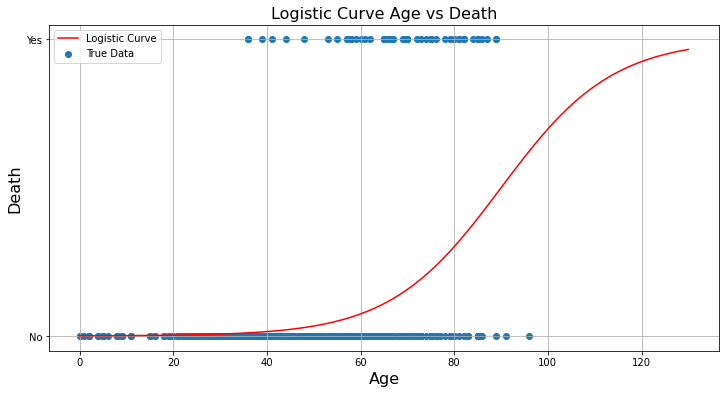

In [49]:
#logistic function
def logistic_func(x,a,b):
    return (1/(1+np.exp(-(a+b*x))))

#Get a and b
a = mymodel.intercept_[0]
b = mymodel.coef_[0,0]

#Create a logistic curve
xplot = np.linspace(0,130,100)
yplot = logistic_func(xplot,a,b)

plt.plot(xplot,yplot, color='red', label='Logistic Curve')
plt.scatter(age,death, label='True Data')
plt.grid()
plt.title('Logistic Curve Age vs Death', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Death', fontsize=16)
plt.legend()
plt.yticks([0,1],['No','Yes'])
plt.gcf().set_size_inches(12,6)
plt.show()

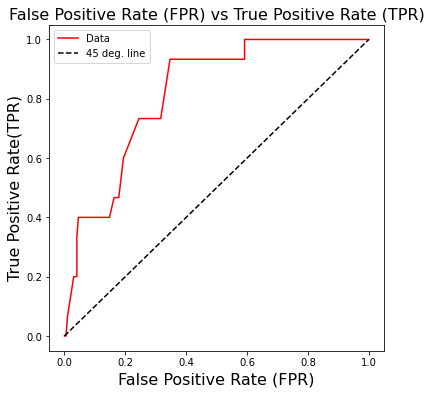

In [54]:
#Create an ROC Curve

#Get the probabilities
probability = mymodel.predict_proba(xtest)[:,1]

#Gett the FPR, TPR, THRESHOLD
FPR,TPR,THRESHOLD = roc_curve(ytest,probability)

#plot the roc curve
plt.plot(FPR,TPR, c='red', label='Data')

#plot the 45 degree line
plt.plot([0,1],[0,1], c='k', ls='--', label='45 deg. line')
plt.gcf().set_size_inches(6,6)
plt.title("COVID19 First 1000 Cases: Age vs. Survival", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=16)
plt.ylabel("True Positive Rate(TPR)", fontsize=16)
plt.legend()
plt.show()



In [62]:
#Create a function for the logistic regression

def log_reg(x,y,i):
    model = LR()
    xtrain,xtest,ytrain,ytest = train_test_split(x,y)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest,ypredict)
    probab = model.predict_proba(xtest)[:,1]
    FPR,TPR,THRESHOLDS = roc_curve(ytest,probab)
    plt.plot(FPR,TPR, c = i, label= str(i))
    return accuracy

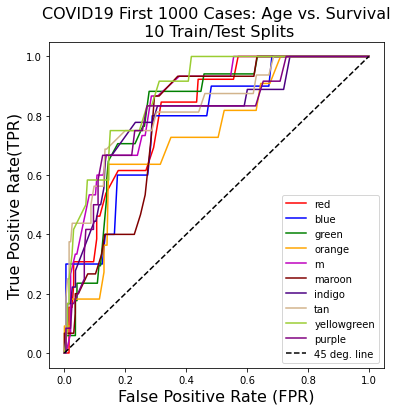

In [68]:
#Collect a list of accuracy
ACCS = []

#Set the color for ten
color = ['red','blue','green','orange','m',
         'maroon','indigo','tan','yellowgreen','purple']

#Repeat test 10 times
for i in range(10):
    ACCS.append(log_reg(age,death,color[i]))

#Create the 45 degree line
plt.plot([0,1],[0,1], c='k', ls='--', label='45 deg. line')
plt.gcf().set_size_inches(6,6)
plt.title("COVID19 First 1000 Cases: Age vs. Survival\n 10 Train/Test Splits", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=16)
plt.ylabel("True Positive Rate(TPR)", fontsize=16)
plt.legend()
plt.show()

In [71]:
# leave out 1 cross validation and use 10 more splits

accuracy_scorer = make_scorer(accuracy_score)

cross_val_accuracies = cross_val_score(LR(), age, death, scoring=accuracy_scorer, cv=10)

cross_val_accuracies.mean()

0.9276330532212885

In [78]:
# Use KFold splits to evaluate Logistic Regression model

# initialze accuracies array
kf_accuracies = []

# initialize KFold object with 10 splits
kf = KFold(n_splits=10)

# loop over each iteration of splits and fit model then calculate
# accuracy of that iteration
for tr_idx, ts_idx in kf.split(age, death):
    model = LR()
    
    x_tr = age[tr_idx]
    x_ts = age[ts_idx]
    
    y_tr = death[tr_idx]
    y_ts = death[ts_idx]
    
    model.fit(x_tr, y_tr)
    
    y_pre = model.predict(x_ts)
    
    kf_accuracies.append(accuracy_score(y_ts, y_pre))
    
np_kf_accuracies = np.array(kf_accuracies)

np_kf_accuracies

array([0.74117647, 0.8       , 0.95294118, 0.97619048, 1.        ,
       1.        , 0.96428571, 0.91666667, 0.97619048, 0.95238095])